# Predicting House Prices by Simple Linear Regression

In this notebook, I will use data on house sales in King County, where Seattle is located, to predict house prices by using simple (one feature) linear regression.

In [1]:
# Import libraries to use
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import Regression

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load  Data

In [2]:
# Load the data
sales_train = pd.read_csv("dataset/kc_house_train_data.csv", dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
)
sales_test = pd.read_csv("dataset/kc_house_test_data.csv", dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
)
display(sales_train.T)

,0,1,2,3,4,5,6,7,8,9,...,17374,17375,17376,17377,17378,17379,17380,17381,17382,17383
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,0249000205,5100403806,0844000965,7852140040,9834201367,7936000429,2997800021,0263000018,0291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20141015T000000,20150407T000000,20140626T000000,20140825T000000,20150126T000000,20150326T000000,20150219T000000,20140521T000000,20150116T000000,20141015T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500,291850,229500,323000,...,1.537e+06,467000,224000,507250,429000,1.0075e+06,475000,360000,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,5,3,3,3,3,4,3,3,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,3.75,2.5,1.75,2.5,2,3.5,2.5,2.5,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,4470,1425,1500,2270,1490,3510,1310,1530,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,8088,1179,11968,5536,1126,7200,1294,1131,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,1,2,3,2,2,3,2,2
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('kc_house_train_data.csv has {} training samples, \
and kc_house_test_data.csv has {} test samples'.format(sales_train['id'].count(), sales_test['id'].count()))

kc_house_train_data.csv has 17384 training samples, and kc_house_test_data.csv has 4229 test samples


In [4]:
print(sales_train.dtypes)

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int32
floors            object
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object


In [5]:
# Check whether there are Null values in training set
sales_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Check whether there are Null values in training set
sales_test.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Hence, there are no NULL values in training and test sets.

## 2. Exploring the data

In order to study the relations between numeric features of interest and price, we draw correlation heatmaps in the following.

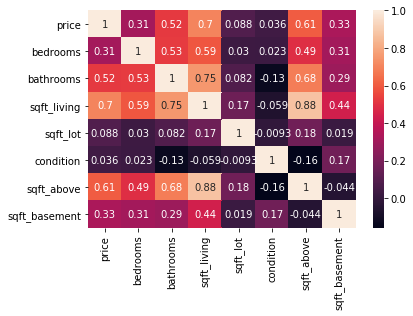

In [7]:
# Calculate correlations
features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement']
corr = sales_train[features].corr()

# Heatmap
sns.heatmap(corr, annot=True)

From above correlation heatmaps, price has the highest positive correlation with size of house, or `sqft_living` so let's plot a scatter plot for price vs. sqft_living below.

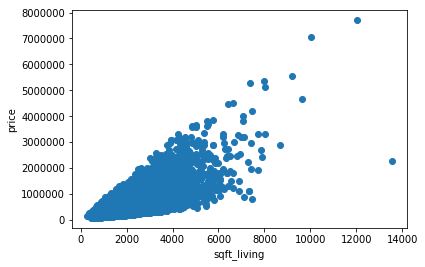

In [8]:
# Plot price vs sqft_living
plt.scatter(sales_train['sqft_living'],sales_train['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

From above figure, we can see that the `price` has linear dependence with `sqft_living` so we will apply **simple linear regression model** by considering one feature, `sqft_living`. Also note that there ia a high leverage point with sqft_living around 14000. This point will affect the resulting linear fit strongly. We will discuss it further in the following.

## 3. Computing Linear Regression Parameters by Closed Form

The cost function of linear regression is defined as

$$ J = \frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))^2 $$

so the gradient of $J$ leads to

$$ \nabla_{\bf w} J = 
\begin{bmatrix}
-\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))\\
-\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))x_i
\end{bmatrix} . \tag{1}$$

To minimize the cost function $J$, we require

$$\nabla_{\bf w} J = 0 $$

Hence, the first element in above matrix (1) leads to 

$$ -\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i)) =0 \Rightarrow -\bar{y} + b + w \bar{x} = 0  $$ 
$$\boxed{ w = \bar{y} - w \bar{x} } \tag{2}$$

where $\bar{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i$, the average of $x$ and, similarly, $\bar{y} \equiv \frac{1}{N}\sum_{i=1}^N y_i$, the average of $y$.

By using (2), we can eliminate $b$ in the second equation in (1). The second element in above matrix results in

$$ -\frac{1}{N}\sum_{i=1}^N (y_i - (b + w x_i))x_i =0 \Rightarrow -\bar{xy} + b \bar{x} + w \bar{x^2} = 0 $$
$$ \boxed{ w = \frac{\bar{x}\bar{y} - \bar{xy}}{\bar{x}^2 - \bar{x^2}} } \tag{3}$$

where $\bar{xy} \equiv \frac{1}{N} \sum_{i=1}^N x_i y_i$ and $\bar{x^2} \equiv \frac{1}{N} \sum_{i=1}^N x_i^2$. 

Therefore, we only need to calculate $\bar{y}$, $\bar{x}$, $\bar{x^2}$, and $\bar{xy}$.

In [9]:
# Convert dataframe into numpy array
X_train = np.c_[sales_train['sqft_living']]
Y_train = np.c_[sales_train['price']]

In [10]:
# Calculate linear regression parameters by closed form in (2) and (3)

# Create an object
model_exact = Regression.ExactLinearRegression()

In [11]:
# fit data to get parameters
parameters_exact = model_exact.simple_linear_regression(X_train, Y_train)

In [12]:
# By using fitting parameters we obtained, predict house price with given sqft_living
predictions_exact = model_exact.predict(X_train, parameters_exact)

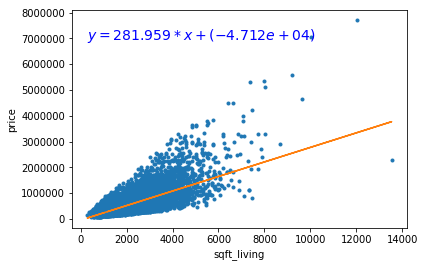

In [13]:
# Plot 
model_exact.plot(X_train, Y_train, predictions_exact, parameters_exact, xlabel='sqft_living', ylabel='price')

### Predict House Price with Given Squarefeet

Now we can calculate a prediction given the slope ($w$) and intercept ($b$). We find out the estimated price for a house with 2650 squarefeet according to the squarefeet model we estiamted above.

In [14]:
# Predict house pricing with given 2650 squarefeet
model_exact.predict(2650.0, parameters_exact)

700074.8459475139

### Predict the Squarefeet with Given Price

What if we want to predict the squarefoot given the price? Since we have an equation $y = b + w*x$, we can solve the function for $x$ such that if we have the intercept ($b$) and the slope ($w$) and the price ($y$), we can solve for the estimated squarefeet ($x$).

$$ x = (y-b)/w .$$

Now we can compute the squarefeet with given the price from our simple linear regression model so let's see how big we might expect a house that costs $800,000 to be

In [15]:
my_house_price = 800000
estimated_squarefeet = model_exact.inverse_regression_predictions(my_house_price, parameters_exact)
print("The estimated squarefeet for a house worth ${} is {}.".format( my_house_price, estimated_squarefeet) )

The estimated squarefeet for a house worth $800000 is 3004.3962451522752.


### Evaluate Model by Residual Sum of Squares

Now we have a model and can make predictions so let's evaluate our model by using **Residual Sum of Squares (RSS)**. Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output. 

$$ RSS \equiv \sum_{i=1}^N (y_i - (b + w x_i))^2 \tag{4}$$

**Reference**
[Residual sum of squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

In [16]:
# Evaluate model by RSS
RSS1 = model_exact.scores(Y_train, predictions_exact)
print("RSS = %1.3e" % RSS1)

RSS = 1.202e+15


RSS for the simple linear regression using squarefeet to predict prices on **TRAINING data** is $1.202 \times 10^{15}$.

## 4. New Model: Estimate Prices From Bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features. As we have seen in correlation heatmap, the bedrooms is the second highest positive correlation with prices. Hence, we now consider the estimation of price from bedrooms instead. 

In [17]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
# Convert dataframe into numpy array
X_train_bed = np.c_[sales_train['bedrooms']]
Y_train_bed = np.c_[sales_train['price']]

In [18]:
# Create an object
model_bed = Regression.ExactLinearRegression()

# fit data to get parameters
parameters_bed = model_bed.simple_linear_regression(X_train_bed, Y_train_bed)

# By using fitting parameters we obtained, predict house price with given bedrooms
predictions_bed = model_bed.predict(X_train_bed, parameters_bed)

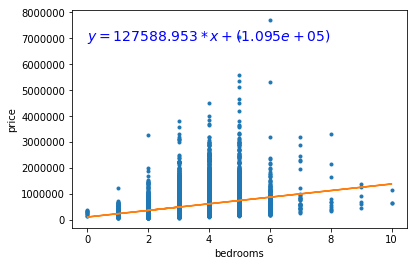

In [19]:
# Plot 
model_bed.plot(X_train_bed, Y_train_bed, predictions_bed, parameters_bed, xlabel='bedrooms', ylabel='price')

In [20]:
# Evaluate model by RSS
RSS2 = model_bed.scores(Y_train_bed, predictions_bed)
print("RSS = %1.3e" % RSS2)

RSS = 2.143e+15


From above figure, we can see that price is not linearly dependent on bedrooms although they are highly positive correlated. Hence, this new model has much higher residual sum of squares for training data.

## 5. Test Linear Regression Algorithm

Now we have two models for predicting the price of a house. How do we know which one is better? Calculate the RSS on the TEST data (recall that this data wasn't involved in learning the model). Compute the RSS from predicting prices using bedrooms and from predicting prices using squarefeet.

In [21]:
# Compute RSS when using bedrooms on TEST data:

# Convert dataframe into numpy array
X_test_bed = np.c_[sales_test['bedrooms']]
Y_test_bed = np.c_[sales_test['price']]

# By using fitting parameters we obtained, predict house price with given bedrooms
predictions_test_bed = model_bed.predict(X_test_bed, parameters_bed)

# Evaluate model by RSS
RSS3 = model_bed.scores(Y_test_bed, predictions_test_bed)
print("RSS when using bedrooms on TEST data = %1.3e" % RSS3)

RSS when using bedrooms on TEST data = 4.934e+14


In [22]:
# Compute RSS when using squarefeet on TEST data:

# Convert dataframe into numpy array
X_test_sqft = np.c_[sales_test['sqft_living']]
Y_test_sqft = np.c_[sales_test['price']]

# By using fitting parameters we obtained, predict house price with given bedrooms
predictions_test_sqft = model_exact.predict(X_test_sqft, parameters_exact)

# Evaluate model by RSS
RSS4 = model_exact.scores(Y_test_sqft, predictions_test_sqft)
print("RSS when using sqft_living on TEST data = %1.3e" % RSS4)

RSS when using sqft_living on TEST data = 2.754e+14


Hecne, the model (square feet) has the lowest RSS on TEST data. This is consistent with the observation in previous section. 